In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# Generate some data and visualize it

Text(0, 0.5, 'y')

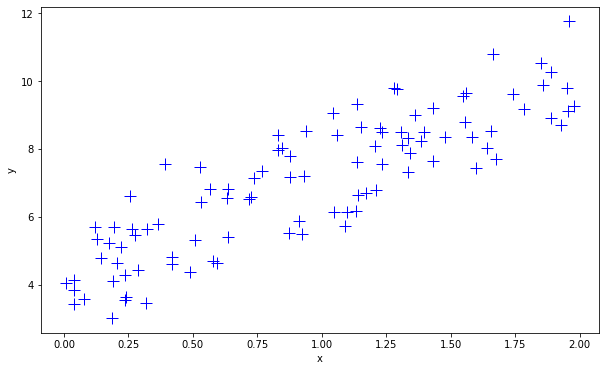

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
m = y.size 
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('x')
plt.ylabel('y')


# define your model

In [3]:
def h(w,X):
    return np.dot(X,w)

# define error measure

In [4]:
def mse(w,X,y): 
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))


# define gradient descend

In [5]:
def gradient_descend(X, w_start = np.zeros(2)):
    w = w_start
    J_values = [] 
    w_store = [] 
    for _ in range(iterations):
        temp_w = w
        J_values.append(mse(w,X,y))
        w_store.append(list(w[:,0]))
        
        for j in range(len(temp_w)):
            temp_w[j] = w[j] - (alpha/m)*np.sum((h(w,X) - y)*np.array(X[:,j]).reshape(m,1))
        w = temp_w
    return w, w_store, J_values



### define a predict function which you will use to make predictions after training is complete

In [6]:
def predict(xval):
    return w[0] + w[1]*xval

# perform the descend and calculate cost function

In [7]:
iterations = 200
alpha = 0.01 # learning rate

w_start = np.zeros((X.shape[1],1))
w, w_store, J_values = gradient_descend(X,w_start)

### plot the results

/tmp/ipykernel_3495978/3208249561.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


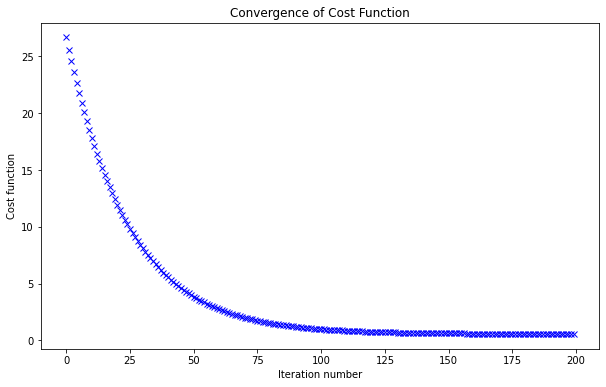

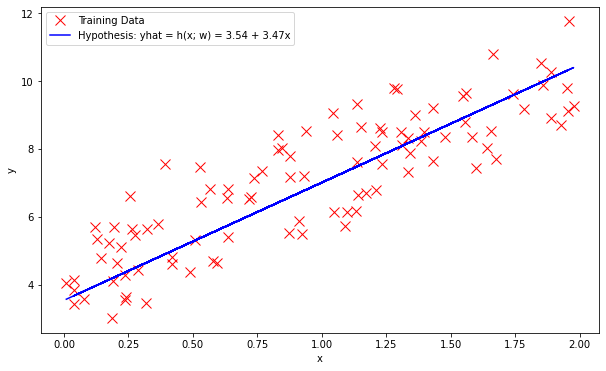

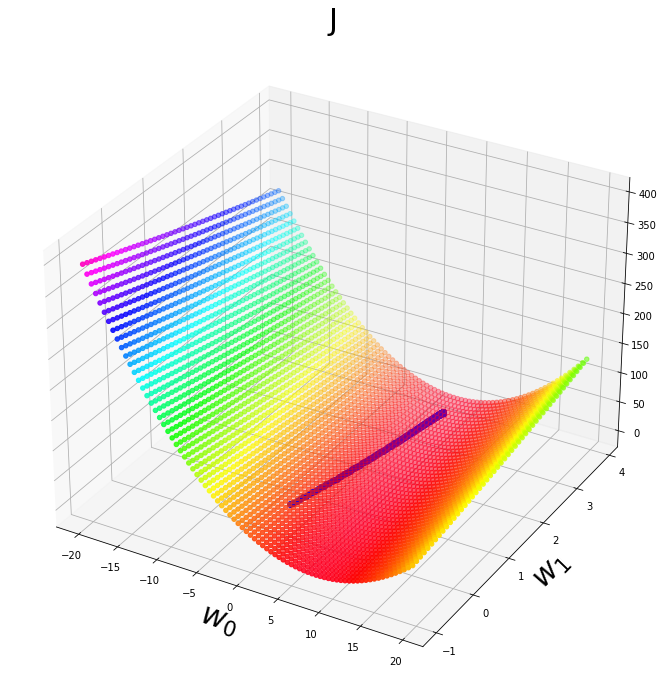

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))
 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()